<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/CLASSIFICATION_PREDICTION_BOLTAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
import pandas as pd

# Load the datasets
data1_path = '/content/sample_data/data1_modified.csv'
data2_path = '/content/sample_data/data2_modified.csv'

# Reading the datasets
data1 = pd.read_csv(data1_path)
data2 = pd.read_csv(data2_path)

# Basic info and first few rows of each dataset
data1_info = data1.info()
data2_info = data2.info()

data1_head = data1.head()
data2_head = data2.head()

# Check for class distribution in both datasets
data1_class_distribution = data1['x44'].value_counts(normalize=True)
data2_class_distribution = data2['x44'].value_counts(normalize=True)

data1_info, data2_info, data1_head, data2_head, data1_class_distribution, data2_class_distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56050 entries, 0 to 56049
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      56050 non-null  float64
 1   x2      56050 non-null  float64
 2   x3      56050 non-null  float64
 3   x4      56050 non-null  float64
 4   x5      56050 non-null  float64
 5   x6      56050 non-null  float64
 6   x7      56050 non-null  int64  
 7   x8      56050 non-null  int64  
 8   x9      56050 non-null  int64  
 9   x10     56050 non-null  int64  
 10  x11     56050 non-null  int64  
 11  x12     56050 non-null  int64  
 12  x13     56050 non-null  int64  
 13  x14     56050 non-null  int64  
 14  x15     56050 non-null  int64  
 15  x16     56050 non-null  int64  
 16  x17     56050 non-null  int64  
 17  x18     56050 non-null  int64  
 18  x19     56050 non-null  int64  
 19  x20     56050 non-null  float64
 20  x21     56050 non-null  int64  
 21  x22     56050 non-null  float64
 22

(None,
 None,
      x1    x2     x3     x4      x5    x6    x7    x8    x9   x10  ...   x35  \
 0  2.00  1.25  62.50  12.50   75.00  1.50  -368  3102   507  3126  ...  2.86   
 1  2.00  0.50  25.00  75.00  100.00  2.00     0  4082    30  4352  ...  4.09   
 2  3.50  1.75  50.00  21.43   71.43  2.50  -853  3463 -1065  3365  ...  4.63   
 3  2.00  1.25  62.50  12.50   75.00  1.50 -1280  2538 -1095  2711  ...  4.45   
 4  3.25  2.50  76.92   7.69   84.62  2.75  -788  8706    33  8679  ...  2.76   
 
     x36   x37   x38   x39   x40   x41   x42   x43    x44  
 0 -1.66 -1.23 -1.75 -1.05 -4.76 -3.51 -5.01 -3.01  False  
 1 -1.46 -1.33 -1.82 -1.33 -5.95 -5.45 -7.45 -5.45  False  
 2 -1.15 -0.77 -1.31 -0.56 -5.32 -3.57 -6.07 -2.57  False  
 3 -0.56 -0.28 -0.62 -0.17 -2.49 -1.24 -2.74 -0.74  False  
 4  0.32  1.23  0.23  1.41  0.88  3.38  0.63  3.88  False  
 
 [5 rows x 44 columns],
     x1    x2     x3     x4     x5    x6   x7   x8   x9  x10  ...   x35   x36  \
 0  5.0  3.50  70.00  70.00   0

In [2]:
# Checking the actual column names for both datasets
data1_columns = data1.columns
data2_columns = data2.columns

data1_columns, data2_columns


(Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
        'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
        'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
        'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
        'x42', 'x43', 'x44'],
       dtype='object'),
 Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
        'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
        'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
        'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
        'x42', 'x43', 'x44'],
       dtype='object'))

<Figure size 1600x800 with 0 Axes>

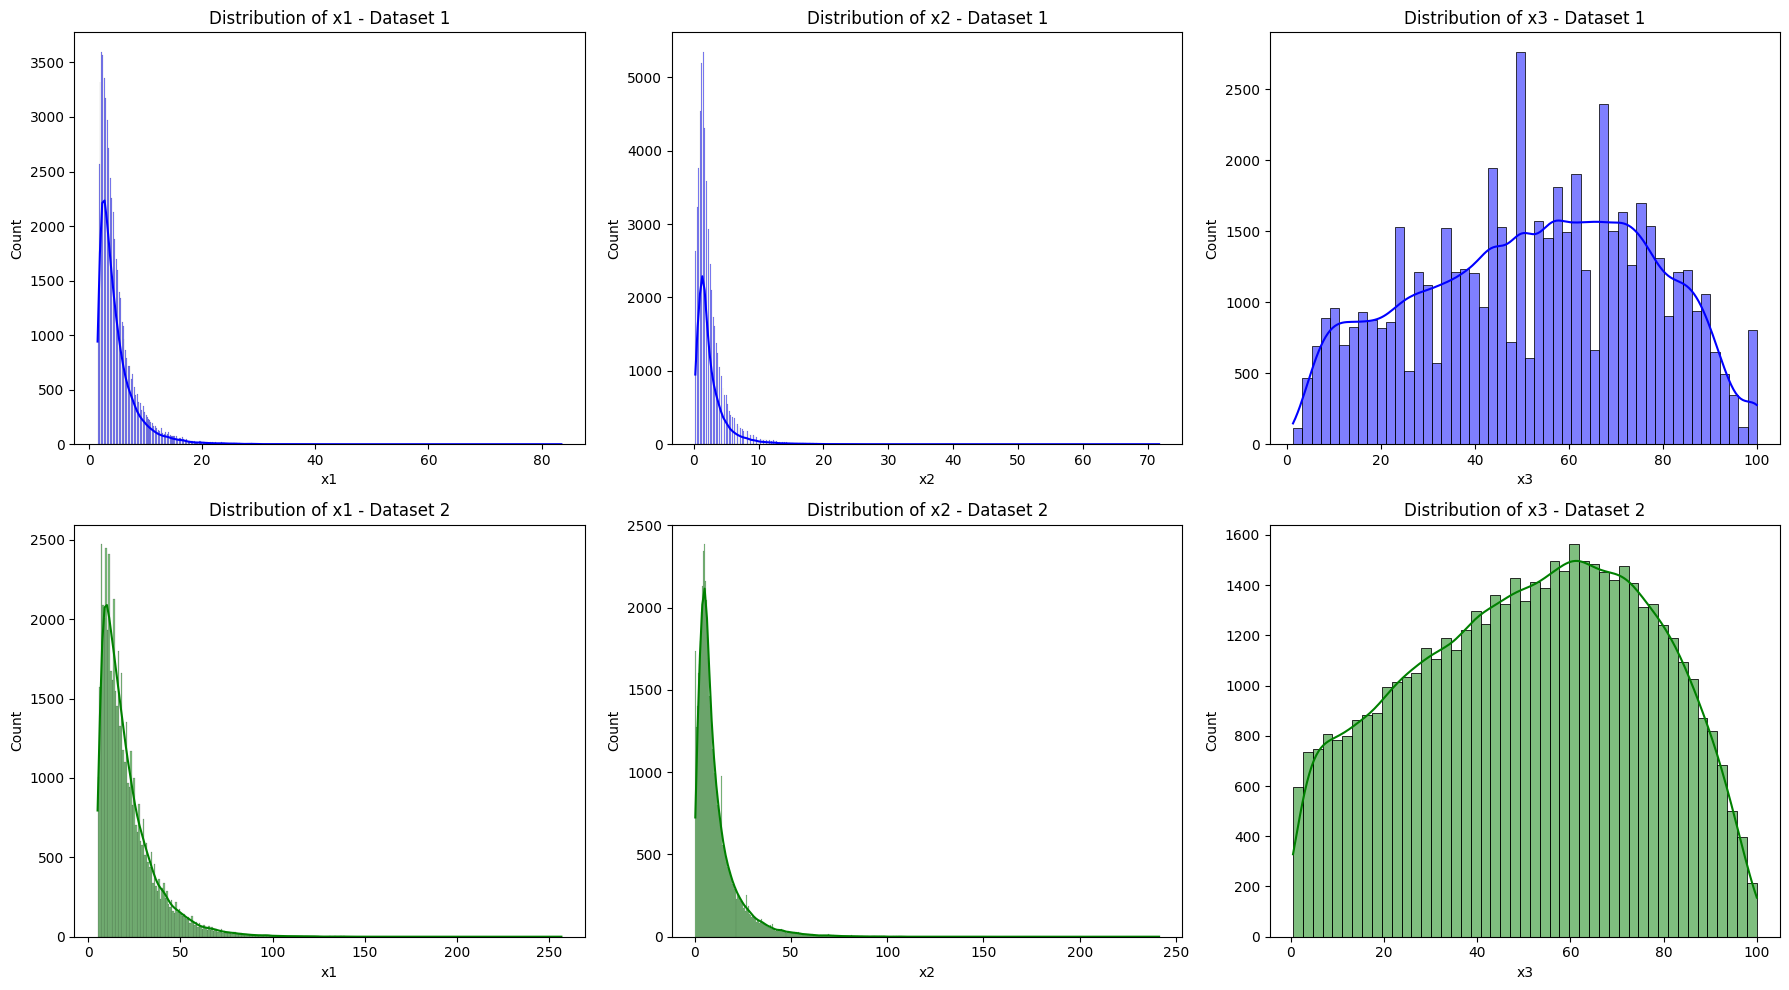

In [7]:
# Re-plotting distributions using the correct column names (first 6 features for simplicity)

plt.figure(figsize=(16, 8))

# Plotting for Dataset 1 and Dataset 2
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Dataset 1
for i, ax in enumerate(axes[0]):
    sns.histplot(data1[f'x{i+1}'], ax=ax, kde=True, color='blue')
    ax.set_title(f'Distribution of x{i+1} - Dataset 1')

# Dataset 2
for i, ax in enumerate(axes[1]):
    sns.histplot(data2[f'x{i+1}'], ax=ax, kde=True, color='green')
    ax.set_title(f'Distribution of x{i+1} - Dataset 2')

plt.tight_layout()
plt.show()


In [8]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Imbalanced learn (for handling class imbalance)
from imblearn.over_sampling import SMOTE


In [9]:
# Load the datasets
data1 = pd.read_csv('/content/sample_data/data1_modified.csv')
data2 = pd.read_csv('/content/sample_data/data2_modified.csv')

# Check first few rows of the datasets
print(data1.head())
print(data2.head())


     x1    x2     x3     x4      x5    x6    x7    x8    x9   x10  ...   x35  \
0  2.00  1.25  62.50  12.50   75.00  1.50  -368  3102   507  3126  ...  2.86   
1  2.00  0.50  25.00  75.00  100.00  2.00     0  4082    30  4352  ...  4.09   
2  3.50  1.75  50.00  21.43   71.43  2.50  -853  3463 -1065  3365  ...  4.63   
3  2.00  1.25  62.50  12.50   75.00  1.50 -1280  2538 -1095  2711  ...  4.45   
4  3.25  2.50  76.92   7.69   84.62  2.75  -788  8706    33  8679  ...  2.76   

    x36   x37   x38   x39   x40   x41   x42   x43    x44  
0 -1.66 -1.23 -1.75 -1.05 -4.76 -3.51 -5.01 -3.01  False  
1 -1.46 -1.33 -1.82 -1.33 -5.95 -5.45 -7.45 -5.45  False  
2 -1.15 -0.77 -1.31 -0.56 -5.32 -3.57 -6.07 -2.57  False  
3 -0.56 -0.28 -0.62 -0.17 -2.49 -1.24 -2.74 -0.74  False  
4  0.32  1.23  0.23  1.41  0.88  3.38  0.63  3.88  False  

[5 rows x 44 columns]
    x1    x2     x3     x4     x5    x6   x7   x8   x9  x10  ...   x35   x36  \
0  5.0  3.50  70.00  70.00   0.00  5.00   47    0   47   -3  .

In [10]:
# Check target class distribution for Dataset 1
print(data1['x44'].value_counts(normalize=True))

# Check target class distribution for Dataset 2
print(data2['x44'].value_counts(normalize=True))

# Summary statistics
print(data1.describe())
print(data2.describe())


x44
False    0.772578
True     0.227422
Name: proportion, dtype: float64
x44
False    0.766041
True     0.233959
Name: proportion, dtype: float64
                 x1            x2            x3            x4            x5  \
count  56050.000000  56050.000000  56050.000000  56050.000000  56050.000000   
mean       4.872319      2.585807     52.590935     26.868416     79.459663   
std        3.645979      2.647797     24.269515     20.692752     16.029705   
min        1.500000      0.250000      1.320000      0.000000      9.210000   
25%        2.500000      1.000000     33.330000     10.000000     70.000000   
50%        3.750000      1.750000     54.550000     23.080000     82.760000   
75%        5.750000      3.250000     71.430000     41.180000     91.430000   
max       83.500000     71.750000    100.000000     95.000000    100.000000   

                 x6            x7            x8            x9           x10  \
count  56050.000000  56050.000000  56050.000000  56050.000000  

In [11]:
# Separate features and target for Dataset 1
X1 = data1.drop('x44', axis=1)
y1 = data1['x44']

# Separate features and target for Dataset 2
X2 = data2.drop('x44', axis=1)
y2 = data2['x44']

# Split into training and testing (maintain order, no shuffle)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, shuffle=False)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, shuffle=False)


In [12]:
# Apply SMOTE to oversample the minority class in Dataset 1
smote = SMOTE()
X1_train_smote, y1_train_smote = smote.fit_resample(X1_train, y1_train)

# Apply SMOTE to Dataset 2
X2_train_smote, y2_train_smote = smote.fit_resample(X2_train, y2_train)


In [13]:
# Scale features using StandardScaler
scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(X1_train_smote)
X1_test_scaled = scaler.transform(X1_test)

X2_train_scaled = scaler.fit_transform(X2_train_smote)
X2_test_scaled = scaler.transform(X2_test)


In [14]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train on Dataset 1
rf.fit(X1_train_scaled, y1_train_smote)

# Train on Dataset 2
rf.fit(X2_train_scaled, y2_train_smote)


RandomForestClassifier(random_state=42)

In [15]:
# Predict on Dataset 1
y1_pred = rf.predict(X1_test_scaled)

# Predict on Dataset 2
y2_pred = rf.predict(X2_test_scaled)

# Precision and Recall for Dataset 1
precision1 = precision_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)
print(f"Dataset 1 - Precision: {precision1}, Recall: {recall1}")

# Precision and Recall for Dataset 2
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)
print(f"Dataset 2 - Precision: {precision2}, Recall: {recall2}")


Dataset 1 - Precision: 0.2328888888888889, Recall: 0.2102728731942215
Dataset 2 - Precision: 0.22771007055805004, Recall: 0.3041988003427592


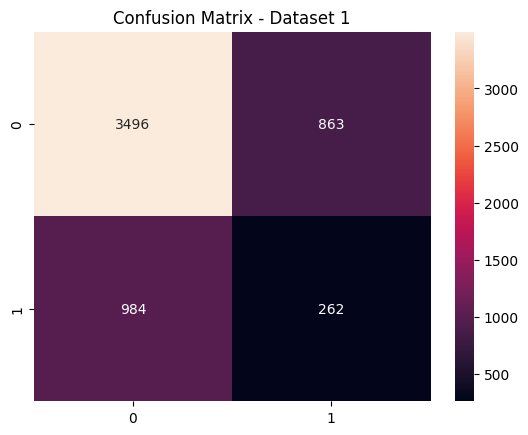

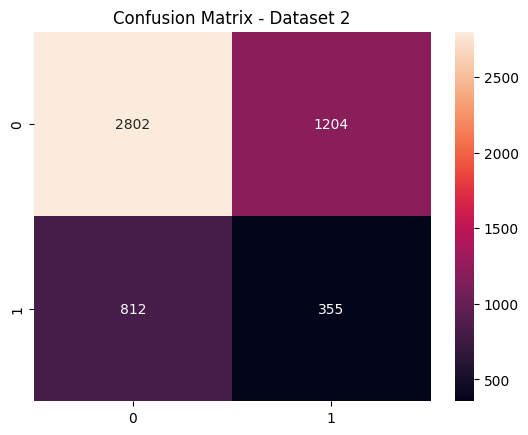

In [16]:
# Confusion Matrix for Dataset 1
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d')
plt.title('Confusion Matrix - Dataset 1')
plt.show()

# Confusion Matrix for Dataset 2
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(conf_matrix2, annot=True, fmt='d')
plt.title('Confusion Matrix - Dataset 2')
plt.show()


In [17]:
# Tune hyperparameters (example)
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the tuned model on Dataset 1
rf_tuned.fit(X1_train_scaled, y1_train_smote)

# Evaluate the tuned model
y1_pred_tuned = rf_tuned.predict(X1_test_scaled)
precision1_tuned = precision_score(y1_test, y1_pred_tuned)
recall1_tuned = recall_score(y1_test, y1_pred_tuned)
print(f"Tuned Model - Dataset 1 - Precision: {precision1_tuned}, Recall: {recall1_tuned}")


Tuned Model - Dataset 1 - Precision: 0.21669902912621358, Recall: 0.4478330658105939


In [18]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=len(y1_train_smote)/sum(y1_train_smote), use_label_encoder=False)

# Train the XGBoost model on Dataset 1
xgb_model.fit(X1_train_scaled, y1_train_smote)

# Evaluate the model
y1_pred_xgb = xgb_model.predict(X1_test_scaled)
precision1_xgb = precision_score(y1_test, y1_pred_xgb)
recall1_xgb = recall_score(y1_test, y1_pred_xgb)
print(f"XGBoost Model - Dataset 1 - Precision: {precision1_xgb}, Recall: {recall1_xgb}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:25:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model - Dataset 1 - Precision: 0.2119168071950534, Recall: 0.3025682182985554


In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class weight set to 'balanced'
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train Logistic Regression on Dataset 1
log_reg.fit(X1_train_scaled, y1_train_smote)

# Evaluate the Logistic Regression model
y1_pred_log = log_reg.predict(X1_test_scaled)
precision1_log = precision_score(y1_test, y1_pred_log)
recall1_log = recall_score(y1_test, y1_pred_log)
print(f"Logistic Regression - Dataset 1 - Precision: {precision1_log}, Recall: {recall1_log}")


Logistic Regression - Dataset 1 - Precision: 0.23054905022118136, Recall: 0.7110754414125201


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset 1 - Decision Tree - Precision: 0.22506561679790027, Recall: 0.2752808988764045


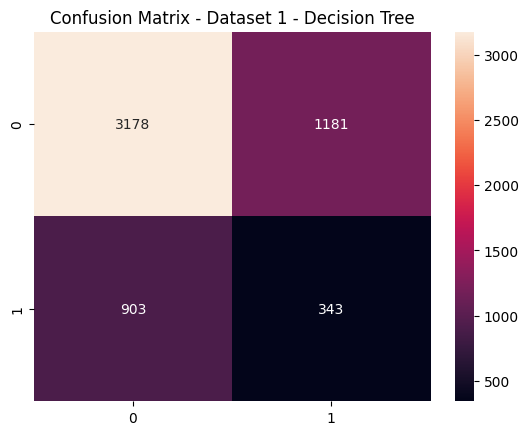

In [20]:
# prompt: apply decision tree

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train on Dataset 1
dt.fit(X1_train_scaled, y1_train_smote)

# Predict on Dataset 1
y1_pred_dt = dt.predict(X1_test_scaled)

# Precision and Recall for Dataset 1
precision1_dt = precision_score(y1_test, y1_pred_dt)
recall1_dt = recall_score(y1_test, y1_pred_dt)
print(f"Dataset 1 - Decision Tree - Precision: {precision1_dt}, Recall: {recall1_dt}")

# Confusion Matrix for Dataset 1
conf_matrix1_dt = confusion_matrix(y1_test, y1_pred_dt)
sns.heatmap(conf_matrix1_dt, annot=True, fmt='d')
plt.title('Confusion Matrix - Dataset 1 - Decision Tree')
plt.show()


In [23]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X1_train_st, y1_train_st = smote_tomek.fit_resample(X1_train, y1_train)

# Train the Random Forest model on SMOTE-Tomek resampled data
rf_smote_tomek = RandomForestClassifier(random_state=42)
rf_smote_tomek.fit(X1_train_st, y1_train_st)

# Evaluate the model
y1_pred_rf_st = rf_smote_tomek.predict(X1_test_scaled)
precision1_st = precision_score(y1_test, y1_pred_rf_st)
recall1_st = recall_score(y1_test, y1_pred_rf_st)
print(f"Random Forest with SMOTE-Tomek - Dataset 1 - Precision: {precision1_st}, Recall: {recall1_st}")


Random Forest with SMOTE-Tomek - Dataset 1 - Precision: 0.22385496183206108, Recall: 0.9414125200642055


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping




In [27]:
# Scale the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [28]:
# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X1_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision', 'Recall'])


In [30]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X1_train_scaled, y1_train_smote, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping])

# Evaluate the model on test data
y1_pred_prob = model.predict(X1_test_scaled)
y1_pred = (y1_pred_prob > 0.5).astype(int)

precision1 = precision_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)

print(f"DNN Model - Dataset 1 - Precision: {precision1}, Recall: {recall1}")

Epoch 1/50
631/631 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Precision: 0.2038 - Recall: 0.0158 - loss: 0.5465 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.5658
Epoch 2/50
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.5294 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.5627
Epoch 3/50
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.2339 - Recall: 1.3020e-04 - loss: 0.5324 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.5656
Epoch 4/50
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.3006 - Recall: 1.7909e-04 - loss: 0.5256 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.5645
Epoch 5/50
631/631 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Precision: 0.6102 - Recall: 1.5608e-04 - loss: 0.5274 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.5629
Epoch 6/50
631/631 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Precision: 0.7156 - Recall: 5.6659e-04 - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import numpy as np

# Check the balance of the training labels
unique, counts = np.unique(y1_train_smote, return_counts=True)
print(dict(zip(unique, counts)))


{False: 38944, True: 38944}
